[*********************100%***********************]  1 of 1 completed


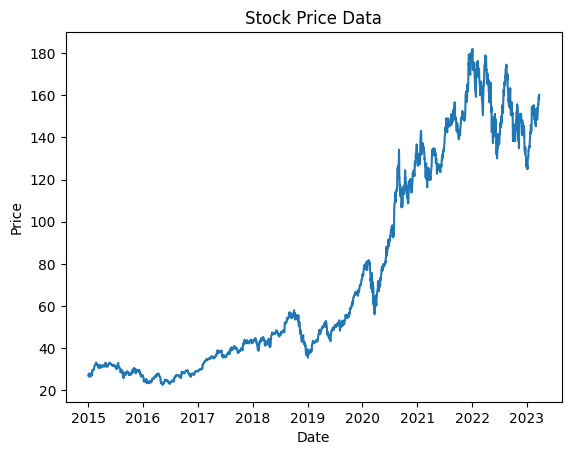

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

# Define the stock ticker and time period
ticker = "AAPL"
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the stock data from Yahoo Finance API
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Visualize the stock data
plt.plot(stock_data['Close'])
plt.title('Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Split the data into training and testing sets
train_data = stock_data[:'2021-01-01']
test_data = stock_data['2021-01-01':]

# Fit the ARIMA model
model = ARIMA(train_data['Close'], order=(1, 1, 1))
model_fit = model.fit(disp=0)

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))[0]

# Visualize the predicted values against the actual values
plt.plot(test_data.index, predictions, label='Predicted')
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model using mean absolute error (MAE)
mae = abs(predictions - test_data['Close']).mean()
print('MAE:', mae)


[*********************100%***********************]  1 of 1 completed


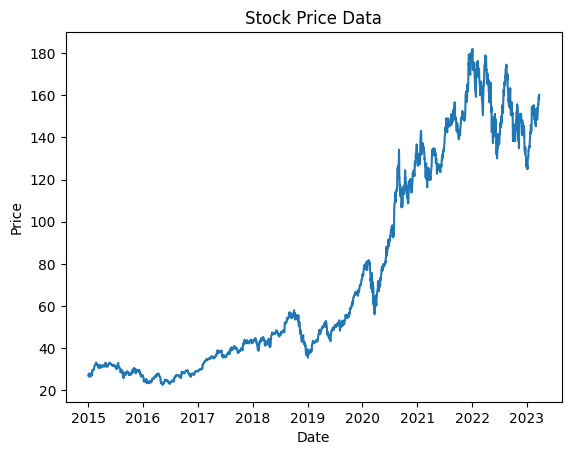

c:\Users\ha_wongbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 0

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Define the stock ticker and time period
ticker = "AAPL"
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the stock data from Yahoo Finance API
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Visualize the stock data
plt.plot(stock_data['Close'])
plt.title('Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Split the data into training and testing sets
train_data = stock_data[:'2021-01-01']
test_data = stock_data['2021-01-01':]

test_data = test_data.reset_index(drop=True)
predictions = model_fit.forecast(steps=len(test_data))[0]

# Fit the ARIMA model
model = ARIMA(train_data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))[0]

# Visualize the predicted values against the actual values
plt.plot(test_data.index, predictions, label='Predicted')
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model using mean absolute error (MAE)
mae = abs(predictions - test_data['Close']).mean()
print('MAE:', mae)



[*********************100%***********************]  1 of 1 completed


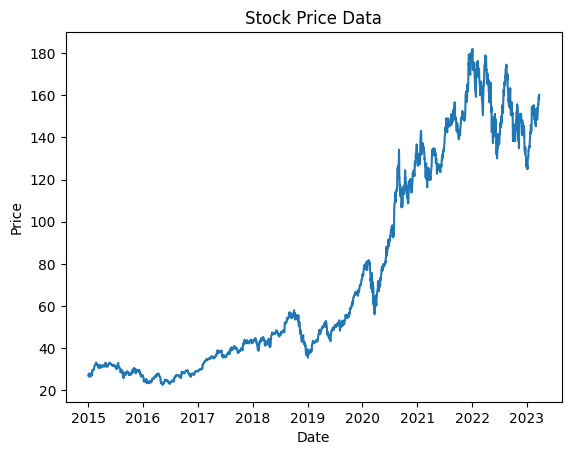

c:\Users\ha_wongbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ha_wongbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ha_wongbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ha_wongbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No suppor

KeyError: 0

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Define the stock ticker and time period
ticker = "AAPL"
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the stock data from Yahoo Finance API
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Visualize the stock data
plt.plot(stock_data['Close'])
plt.title('Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Split the data into training and testing sets
train_data = stock_data[:'2021-01-01']
test_data = stock_data['2021-01-01':]

# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test_data))[0]

# Linear regression model
lr_model = LinearRegression()
lr_model.fit(train_data.index.values.reshape(-1, 1), train_data['Close'])
lr_predictions = lr_model.predict(test_data.index.values.reshape(-1, 1))

# Random forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_data.index.values.reshape(-1, 1), train_data['Close'])
rf_predictions = rf_model.predict(test_data.index.values.reshape(-1, 1))

# Visualize the predicted values against the actual values
plt.plot(test_data.index, arima_predictions, label='ARIMA')
plt.plot(test_data.index, lr_predictions, label='Linear Regression')
plt.plot(test_data.index, rf_predictions, label='Random Forest')
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the models using mean absolute error (MAE)
arima_mae = abs(arima_predictions - test_data['Close']).mean()
lr_mae = abs(lr_predictions - test_data['Close']).mean()
rf_mae = abs(rf_predictions - test_data['Close']).mean()
print('ARIMA MAE:', arima_mae)
print('Linear Regression MAE:', lr_mae)
print('Random Forest MAE:', rf_mae)
